# <center> CS559: Homework #2 </center>
###  <center> Due:10/8/2021 Friday 11:59 PM</center>

- Change the file name as YourName_F21_CS559_HW2
- Submit the assignment in `ipynb` and `html` formats. 
    - You can export the notebook in HTML. 
    - Do not compress your files. Please submit files individually. 
- All work must be your own and must not be shared with other classmates. 
    - Collaboration with classmates or getting help by any people is not acceptable. 
    - For impletementation problems, do not copy algorithms from internet. 

### Problem 1 - Linear Regression [35 pts]

1-a. Consider a data set in which each data point $t_n$ is associated with a weighting factor $r_n>0$, so that the sum of squares error function becomes 

$${\large E_D(\vec{w})=\frac{1}{2}\sum_{n=1}^Nr_n\big(t_n-\vec{w}^T\vec{x}_n\big)^2}$$

Find an expression for the solution $w^*$ that minimizes this error function. [5 pts]

I have tried to add image file but have not been able to. I will attach the solution in seprate file
# <img scr="1a.jpg">

1-b. Implement a function called, `my_error(data,r_n)`, that estimates the error using the error function, $E_D(\vec{w})$, from 1-a. The task to implement a function to estimates the optimized $vec{w}$ and demonstrates the behavior of error at different weighting factor, $r_n$, values. The function return a list of $\vec{w}$, $r_n$, and error. Do not use any other modules except `numpy`. [10 pts]

In [8]:
data = pd.read_csv('./HW2_LR.csv')
x = data.b
x.shape[0]

10000

In [9]:
### my_LR starts here
import numpy as np
def my_error(data,r_n):
    
    y = data.y
    x = data.b # I have selected b because of EDA done in 1.c
    
    error = []
    
    for r in r_n:
        w = sum([r*y[i]*x[i] for i in range(x.shape[0])]) / sum([r*x[i]*x[i].T  for i in range(x.shape[0])])
        error.append(1/2 * sum([r * (y[i]-w.T*x[i])**2 for i in range(x.shape[0])]))
    
    return w, error, r_n

1-c. Load the dataset, make a model using Linear Regression from sklearn.linear_model to predict the target `y` from a given dataset `HW2_LR.csv`. Students must do EDA and pre-processing the dataset before training the model. All pre-processing and EDA work must be explained and the weights and mean squared error value must be reported. Treat the whole dataset as a train set. [15 pts]

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import skew
import numpy as np 
import pandas as pd
from sklearn.metrics import r2_score
import seaborn as sns

#Pre-processing and EDA Starts here

In [11]:
print("Shape:",data.shape)
print("num samples =",data.shape[0])
print("num attributes =",data.shape[1])

Shape: (10000, 6)
num samples = 10000
num attributes = 6


In [12]:
data.describe()

,a,b,c,d,k,y
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,150.445884,98.084535,5394.432218,-0.779184,0.788158,-3.716766e+05
std,86.830028,346.622332,2652.750144,0.617875,0.627936,1.842971e+06
min,1.010000,-499.850000,800.690000,-3.863405,-0.489047,-6.532252e+06
25%,74.447500,-204.830000,3119.750000,-1.142718,0.313955,-1.404627e+06
50%,151.250000,98.705000,5394.045000,-0.685267,0.678321,-7.736748e+04
75%,225.652500,399.640000,7714.985000,-0.306234,1.168409,8.068422e+05
max,299.960000,699.940000,9999.390000,0.648288,3.618800,3.523715e+06


In [13]:
# random values based on a normal distribution
x = data['b']
  
# print ("X : \n", x)
  
print('\nSkewness for data : ', skew(x))


Skewness for data :  0.006230401565191973


In [14]:
data.isnull().values.any()

False

Text(0, 0.5, 'y')

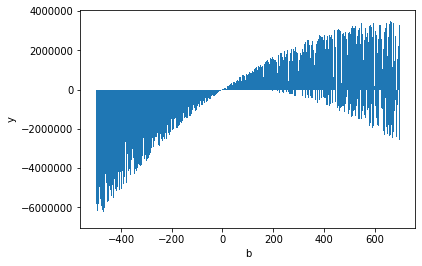

In [15]:
plt.bar(data['b'], data['y'])
plt.xlabel('b')
plt.ylabel('y')

Text(0, 0.5, 'y')

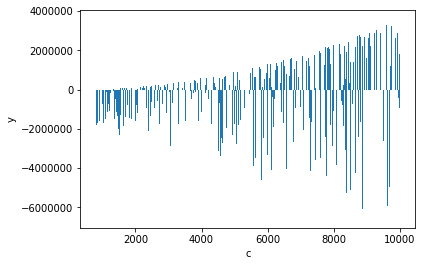

In [16]:
plt.bar(data['c'], data['y'])
plt.xlabel('c')
plt.ylabel('y')

Text(0, 0.5, 'a')

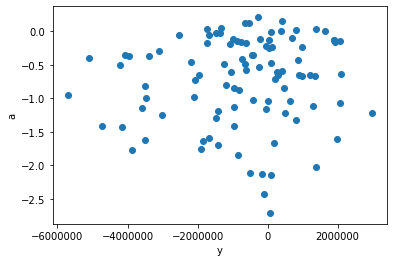

In [17]:
plt.scatter(data['y'][:100], data['d'][:100])
plt.xlabel('y')
plt.ylabel('a')

Text(0, 0.5, 'a')

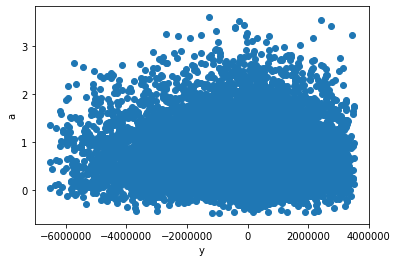

In [18]:
plt.scatter(data['y'], data['k'])
plt.xlabel('y')
plt.ylabel('a')

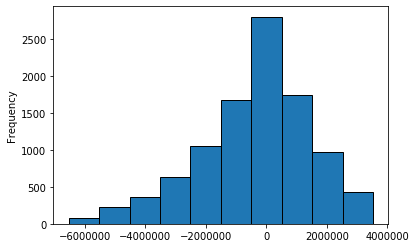

In [19]:
data['y'].plot(kind='hist',edgecolor="k")


Text(0, 0.5, 'b')

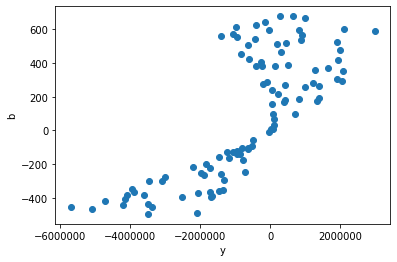

In [20]:
plt.scatter(data['y'][:100], data['b'][:100])
plt.xlabel('y')
plt.ylabel('b')

Text(0, 0.5, 'y')

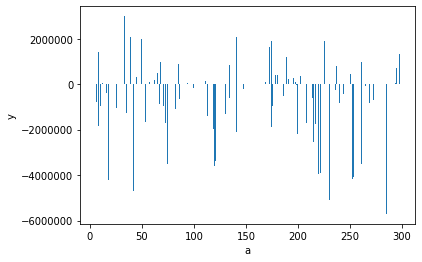

In [21]:
plt.bar(data['a'][:100], data['y'][:100])
plt.xlabel('a')
plt.ylabel('y')

#Linear Regression Mode starts here

In [22]:
X = data['b'] # I have selected b because it shows the most appropriate graph for linear regression 
y = data['y']

In [23]:
X_train = X
X_test = X
y_train = y
y_test = y

In [24]:
X_train.shape

(10000,)

In [25]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [26]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
y_train_pred = lr.predict(X_train).reshape(-1,1)
y_test_pred = lr.predict(X_test).reshape(-1,1)

In [28]:
print('Mean squared error: %.2f' % mean_squared_error(y_test,y_test_pred))
print('Mean squared error: %.2f' % mean_squared_error(y_train,y_train_pred))

Mean squared error: 1445906957275.44
Mean squared error: 1445906957275.44


In [29]:
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.5742576130459376
0.5742576130459376


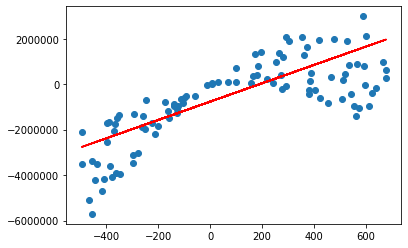

In [35]:
plt.scatter(X_test[:100], y_test[:100])
plt.plot(X_test[:100], y_test_pred[:100], color='red') # predicted
plt.show()

1-d. Use the function `my_error()` from 1-b to estimate $\vec{w}$ and make a visualization to show the behavior of error in terms of $r_n$. Add a point to indicate the final training model error obtained from 1-c. [5 pts]

In [30]:
r_n = []
i = 0

while i < 0.2:
    i += 0.002
    r_n.append(i)
    
w, error, r_n = my_error(data,r_n)
print("W:",w,", error:",error,"r_n:",r_n)

W: 3449.4724515810426 , error: [19904012797068.73, 39808025594137.46, 59712038391206.08, 79616051188274.92, 99520063985343.75, 119424076782412.16, 139328089579480.31, 159232102376549.84, 179136115173619.16, 199040127970687.6, 218944140767756.62, 238848153564824.3, 258752166361894.4, 278656179158960.72, 298560191956031.25, 318464204753099.9, 338368217550168.2, 358272230347238.5, 378176243144307.44, 398080255941375.4, 417984268738443.3, 437888281535513.4, 457792294332580.8, 477696307129648.75, 497600319926717.44, 517504332723788.94, 537408345520855.9, 557312358317921.56, 577216371114992.9, 597120383912062.5, 617024396709130.2, 636928409506200.1, 656832422303266.4, 676736435100336.5, 696640447897405.4, 716544460694477.1, 736448473491545.2, 756352486288615.1, 776256499085677.0, 796160511882750.8, 816064524679820.1, 835968537476886.6, 855872550273952.4, 875776563071026.8, 895680575868093.2, 915584588665161.8, 935488601462234.6, 955392614259297.8, 975296627056366.9, 995200639853435.1, 101510

Text(0, 0.5, 'r_n')

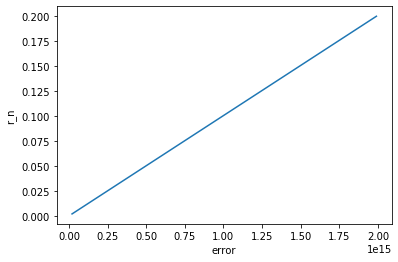

In [25]:
plt.plot(error,r_n)
plt.xlabel('error')
plt.ylabel('r_n')


### Problem 2 - Linear Classification 1 [65 pts]

In this assignment, you are going to implement three classifiers - **LDA, Perceptron, and Logistic Regression** - to predict the risk of heart attack using the provided dataset, `heart.csv`. 

Here are data attributes:
- Age : Age of the patient
- Sex : Sex of the patient
- exang: exercise induced angina (1 = yes; 0 = no)
- ca: number of major vessels (0-3)
- cp : Chest Pain type chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- trtbps : resting blood pressure (in mm Hg)
- chol : cholestoral in mg/dl fetched via BMI sensor
- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg : resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach : maximum heart rate achieved
- output : 0= less chance of heart attack 1= more chance of heart attack

2-a. Implement `my_LDA` that classifies the target. Use `accuracy_score` from `sklearn.metrics` to calculate the accuracy. [10 pts]

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [27]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('./heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
df_x=df[['cp','exng','oldpeak','slp']]
df_y=df['output']
df_x

,cp,exng,oldpeak,slp
0,3,0,2.3,0
1,2,0,3.5,0
2,1,0,1.4,2
3,1,0,0.8,2
4,0,1,0.6,2
...,...,...,...,...
298,0,1,0.2,1
299,3,0,1.2,1
300,0,0,3.4,1
301,0,1,1.2,1


In [29]:
import numpy as np

def LDA(X, y, n_components):
    
    linear_discriminants = None

    n_features = X.shape[1]
    class_labels = np.unique(y)

    mean_overall = np.mean(X, axis=0)
    SW = np.zeros((n_features, n_features))
    SB = np.zeros((n_features, n_features))
    
    for c in class_labels:
        
        X_c = X[y == c]
        mean_c = np.mean(X_c, axis=0)
        SW += (X_c - mean_c).T.dot((X_c - mean_c))
        n_c = X_c.shape[0]
        mean_diff = (mean_c - mean_overall).values.reshape(n_features, 1) 
        SB += n_c * (mean_diff).dot(mean_diff.T)
        
    A = np.linalg.inv(SW).dot(SB)
    eigenvalues, eigenvectors = np.linalg.eig(A)
    eigenvectors = eigenvectors.T
    idxs = np.argsort(abs(eigenvalues))[::-1]
    eigenvalues = eigenvalues[idxs]
    eigenvectors = eigenvectors[idxs]
    linear_discriminants = eigenvectors[0 : n_components]

    return linear_discriminants

def transform(X, linear_discriminants):
   
    return np.dot(X, linear_discriminants.T)


Shape of X: (303, 4)
Shape of transformed X: (303, 2)


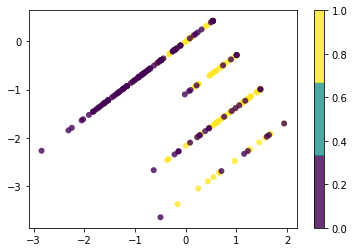

In [30]:
X, y = df_x, df_y

linear_discriminants = LDA(X, y, 2)
X_projected = transform(X, linear_discriminants)
print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)

x1, x2 = X_projected[:, 0], X_projected[:, 1]

plt.scatter(
    x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
)

plt.colorbar()
plt.show()
# I have not understood on what bases we calculate the accuracy of LDA

2-b. Implement `my_Perceptron` that classifies the target. Use `accuracy_score` from `sklearn.metrics` to calculate the accuracy. [10 pts]

In [136]:
# I have taken this inputs values as based on the correlation values wrt output computed in 2-d.
df_x_per=df[['cp','exng','oldpeak','thalachh','slp']]
df_y_per=df['output']

In [137]:
### my_Perceptron starts here
import numpy as np

def activation_func(x):
    return np.where(x >= 0, 1, 0)

def my_Perceptron(X, y, lr=0.01, n_iters=1000):
    
    n_samples = X.shape[0] 
    n_features = X.shape[1]
    weights = np.zeros(n_features)
    bias = 0
    y_ = np.array([])
    
    for a in y:
        if a > 0:
            y_ = np.append(y_,1)
        else:
            y_ = np.append(y_,0)
            
    for _ in range(n_iters):

        for idx, x_i in enumerate(X):
            
            linear_output = np.dot(x_i, weights) + bias
            y_predicted = activation_func(linear_output)    
            update = lr * (y_[idx] - y_predicted)
            weights += update * x_i
            bias += update

    return weights, bias

def my_Perceptron_predict(X, weights, bias):
    linear_output = np.dot(X, weights) + bias
    y_predicted = activation_func(linear_output)
    return y_predicted

In [138]:
y=df_y_per.to_numpy()

X=df_x_per.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

weights, bias = my_Perceptron(X_train, y_train, lr = 0.03, n_iters = 1000)
y_pred_per = my_Perceptron_predict(X_test, weights, bias)

print(f"my_Perceptron classification accuracy {accuracy_score(y_test, y_pred_per )*100}%")

my_Perceptron classification accuracy 85.24590163934425%


2-c. Implement `my_LogisticRegression` that classifies the target. Use `accuracy_score` from `sklearn.metrics` to calculate the accuracy. [10 pts]

In [139]:
# I have taken this inputs values as based on the correlation values wrt output computed in 2-d.
df_x_lr=df[['cp','exng','oldpeak','slp','thall']] 
df_y_lr=df['output']

In [140]:
def sigmoid_func(x):
    return 1 / (1 + np.exp(-x))

def my_LogisticRegression(X, y, lr=0.001, n_iters=1000):

    n_samples = X.shape[0]
    n_features = X.shape[1]
    weights = np.zeros(n_features)
    bias = 0

    for _ in range(n_iters):
        
        linear_model = np.dot(X, weights) + bias
        y_predicted = sigmoid_func(linear_model)
        dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
        db = (1 / n_samples) * np.sum(y_predicted - y)
        weights -= lr * dw
        bias -= lr * db

    return weights,bias
    
def my_LogisticRegresion_predict(X,weights,bias):
    
    linear_model = np.dot(X, weights) + bias
    y_predicted = sigmoid_func(linear_model)
    
    y_predicted_cls = []
    for a in y_predicted:
        if a > 0.5:
            y_predicted_cls.append(1)
        else:
            y_predicted_cls.append(0)

    return np.array(y_predicted_cls)

In [141]:
X = df_x_lr.to_numpy()
y = df_y_lr.to_numpy()

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

weights,bias = my_LogisticRegression(X_train,y_train,lr=0.001, n_iters=1000)
y_pred_lr = my_LogisticRegresion_predict(X_test,weights,bias)

print(f"my_LogisticRegression classification accuracy {accuracy_score(y_test, y_pred_lr)*100}%")

my_LogisticRegression classification accuracy 88.52459016393442%


2-d. The EDA and pre-processing are not limitted however, you must
1. check if the data is **balanced** or not. 
2. check if features are **skewed** or not.
3. check outliers. 

For any finds from 1 to 3, please handle the data carefully. Exaplin your workflow and perform accordingly. If any interesting facts are learned, please state them. [15 pts]

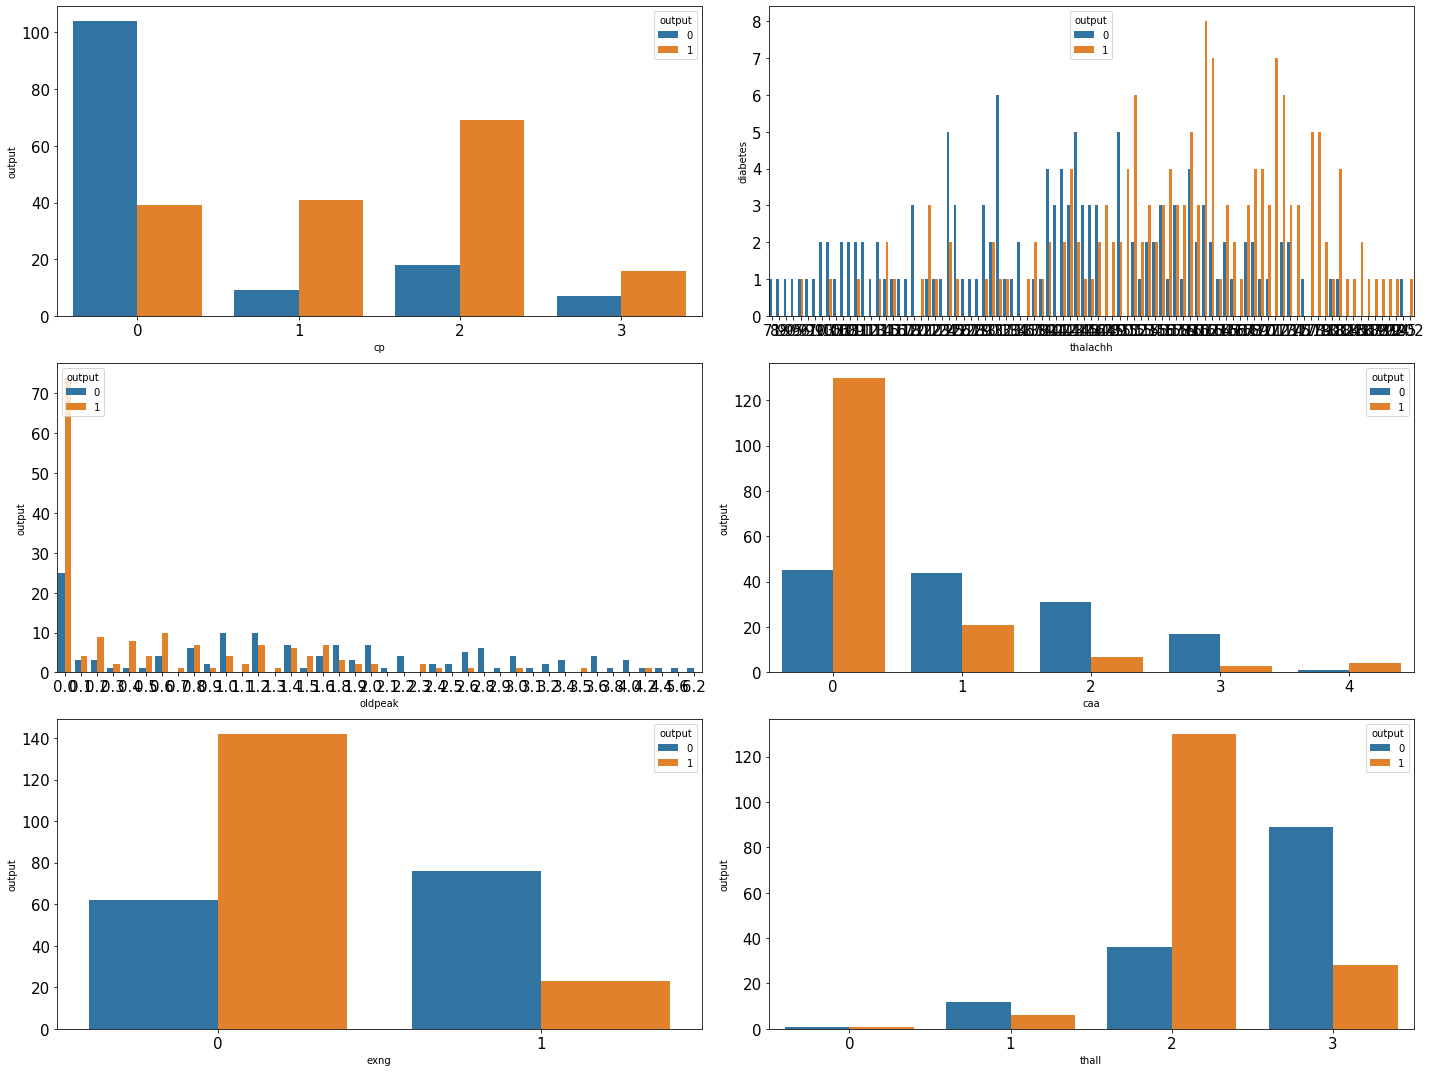

In [37]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows = 3, ncols = 2, figsize = (20,15))

sns.countplot(x='cp',hue='output', data=df, ax = ax1)
ax1.set_xlabel('cp')
ax1.set_ylabel('output')
ax1.tick_params(labelsize=15)

sns.countplot(x='thalachh',hue='output', data=df, ax = ax2)
ax2.set_xlabel('thalachh')
ax2.set_ylabel('diabetes')
ax2.tick_params(labelsize=15)

sns.countplot(x='oldpeak',hue='output', data=df, ax = ax3)
ax3.set_xlabel('oldpeak')
ax3.set_ylabel('output')
ax3.tick_params(labelsize=15)

sns.countplot(x='caa',hue='output', data=df, ax = ax4)
ax4.set_xlabel('caa')
ax4.set_ylabel('output')
ax4.tick_params(labelsize=15)

sns.countplot(x='exng',hue='output', data=df, ax = ax5)
ax5.set_xlabel('exng')
ax5.set_ylabel('output')
ax5.tick_params(labelsize=15)

sns.countplot(x='thall',hue='output', data=df, ax = ax6)
ax6.set_xlabel('thall')
ax6.set_ylabel('output')
ax6.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [38]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [39]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Here we check if the data is balanced or not

In [40]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [41]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [42]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [43]:
df['trtbps'].value_counts()

120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
132     8
118     7
135     6
108     6
124     6
145     5
134     5
152     5
122     4
170     4
100     4
142     3
115     3
136     3
105     3
180     3
126     3
102     2
94      2
144     2
178     2
146     2
148     2
129     1
165     1
101     1
174     1
104     1
172     1
106     1
156     1
164     1
192     1
114     1
155     1
117     1
154     1
123     1
200     1
Name: trtbps, dtype: int64

In [44]:
df['chol'].value_counts()

234    6
204    6
197    6
269    5
212    5
      ..
278    1
281    1
284    1
290    1
564    1
Name: chol, Length: 152, dtype: int64

In [45]:
df['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [46]:
df['thalachh'].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalachh, Length: 91, dtype: int64

In [47]:
df['exng'].value_counts()

0    204
1     99
Name: exng, dtype: int64

In [48]:
df['oldpeak'].value_counts()

0.0    99
1.2    17
0.6    14
1.0    14
0.8    13
1.4    13
0.2    12
1.6    11
1.8    10
0.4     9
2.0     9
0.1     7
2.6     6
2.8     6
1.9     5
1.5     5
0.5     5
3.0     5
2.2     4
3.6     4
2.4     3
3.4     3
4.0     3
0.9     3
0.3     3
2.3     2
4.2     2
1.1     2
2.5     2
3.2     2
6.2     1
2.1     1
4.4     1
1.3     1
3.1     1
0.7     1
5.6     1
3.8     1
2.9     1
3.5     1
Name: oldpeak, dtype: int64

In [49]:
df['age'].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

In [50]:
df['slp'].value_counts()

2    142
1    140
0     21
Name: slp, dtype: int64

In [51]:
df['caa'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64

In [52]:
df['thall'].value_counts()

2    166
3    117
1     18
0      2
Name: thall, dtype: int64

From the above observation we can state that output data has most balanced data.

In [53]:
correlation_df = df.corr()
correlation_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [54]:
correlation_df.loc['output']

age        -0.225439
sex        -0.280937
cp          0.433798
trtbps     -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalachh    0.421741
exng       -0.436757
oldpeak    -0.430696
slp         0.345877
caa        -0.391724
thall      -0.344029
output      1.000000
Name: output, dtype: float64

Here we are checking the outliers

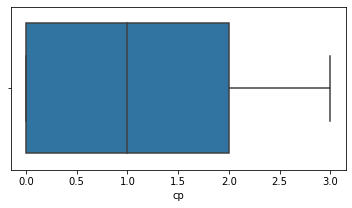

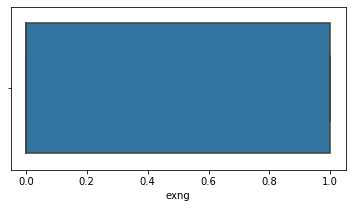

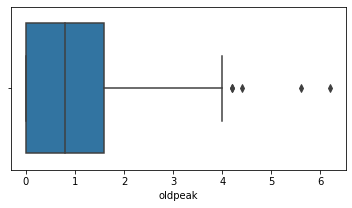

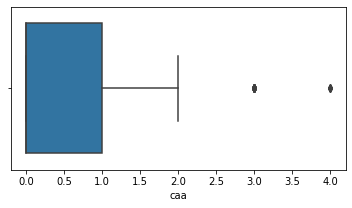

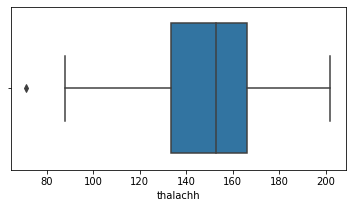

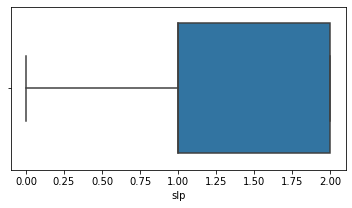

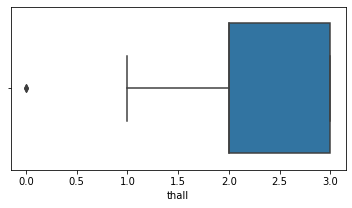

In [55]:
import seaborn as sns

col2=['cp','exng','oldpeak','caa','thalachh','slp','thall']
for c in col2:
    fig=plt.figure(figsize=(6,3))
    sns.boxplot(x=df[c],hue=df.output)


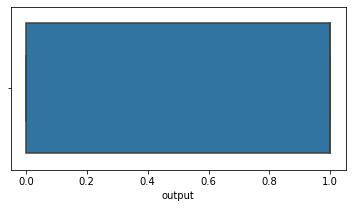

In [56]:
fig=plt.figure(figsize=(6,3))
sns.boxplot(x=df['output'],hue=df.output)

From the above box plot, we can see that:
cp, exng, slp & output have no outliers, while for the oldpeak, caa, thalachh, thall there are outlier not included in the box of other observation.

Here we are finding the skewness of data & if the data is right skewed or left skewed

In [57]:
print('\nSkewness for dataset =', skew(df))


Skewness for dataset = [-0.20145969 -0.78741229  0.4823294   0.71023006  1.13773262  1.97680346
  0.16171657 -0.53474554  0.73885058  1.26342552 -0.50579573  1.30392596
 -0.47435893 -0.17892962]


C:\Users\dell\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


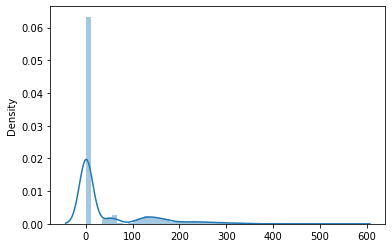

In [58]:
plt.figure()
sns.distplot(df)
plt.show()

In [59]:
print('\nSkewness for cp =', skew(df.cp))


Skewness for cp = 0.4823293961332623


In [60]:
np.mean(df['cp'])

0.966996699669967

In [61]:
from scipy import stats
stats.mode(df['cp'])

ModeResult(mode=array([0], dtype=int64), count=array([143]))

In [62]:
df.iloc[143]['cp']

0.0

C:\Users\dell\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


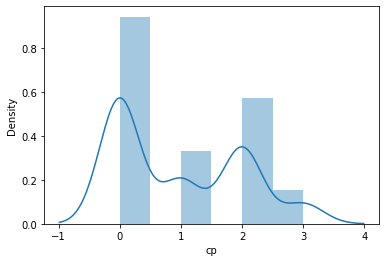

In [63]:
 plt.figure()
sns.distplot(df['cp'])
plt.show()

cp is Symmetric Skewed data & mean > mode, so it is Right skewed or Positive Skewed.

In [64]:
print('\nSkewness for exng =', skew(df.exng))


Skewness for exng = 0.7388505791113107


In [65]:
stats.mode(df['exng'])

ModeResult(mode=array([0], dtype=int64), count=array([204]))

In [66]:
df.iloc[204]['exng']

0.0

In [67]:
np.mean(df['exng'])

0.32673267326732675

C:\Users\dell\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


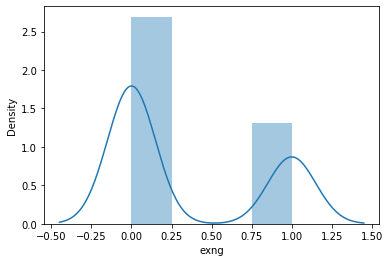

In [68]:
plt.figure()
sns.distplot(df['exng'])
plt.show()

exng is Moderate Skewed data & mean > mode, so it is Right skewed or Positive Skewed.

In [69]:
print('\nSkewness for oldpeak =', skew(df.oldpeak))


Skewness for oldpeak = 1.2634255245891595


C:\Users\dell\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


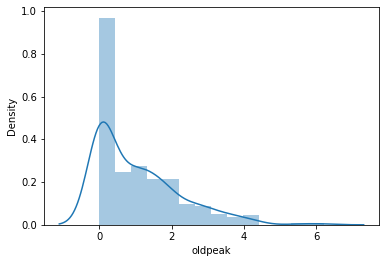

In [70]:
plt.figure()
sns.distplot(df['oldpeak'])
plt.show()

In [71]:
print('\nSkewness for oldpeak =', skew(df.caa))


Skewness for oldpeak = 1.303925955673585


In [72]:
np.mean(df['oldpeak'])

1.0396039603960396

In [73]:
stats.mode(df['oldpeak'])

ModeResult(mode=array([0.]), count=array([99]))

In [74]:
df.iloc[99]['oldpeak']

0.0

oldpeak is Highly Skewed data & mean > mode, so it is Right skewed or Positive Skewed

In [75]:
print('\nSkewness for thalachh =', skew(df.thalachh))


Skewness for thalachh = -0.5347455419075503


C:\Users\dell\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


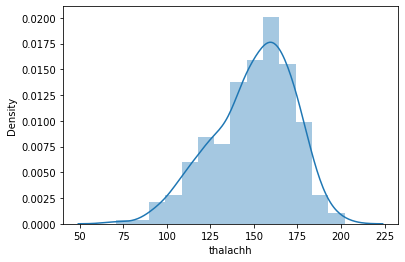

In [76]:
plt.figure()
sns.distplot(df['thalachh'])
plt.show()

In [77]:
np.mean(df['thalachh'])

149.64686468646866

In [78]:
stats.mode(df['thalachh'])

ModeResult(mode=array([162], dtype=int64), count=array([11]))

In [79]:
df.iloc[11]['thalachh']

139.0

 thalachh is Moderate Skewed data & mean > mode, so it is Right skewed or Positive Skewed

In [80]:
print('\nSkewness for slp =', skew(df.slp))


Skewness for slp = -0.5057957274757736


In [81]:
np.mean(df['slp'])

1.3993399339933994

In [82]:
stats.mode(df['slp'])

ModeResult(mode=array([2], dtype=int64), count=array([142]))

In [83]:
df.iloc[142]['slp']

1.0

C:\Users\dell\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


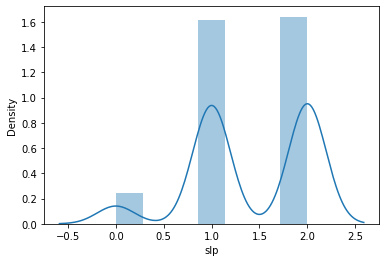

In [84]:
plt.figure()
sns.distplot(df['slp'])
plt.show()

slp is Symmetric Skewed data & mean > mode, so it is Right skewed or Positive Skewed

In [85]:
print('\nSkewness for thall =', skew(df.thall))


Skewness for thall = -0.47435893118696904


C:\Users\dell\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


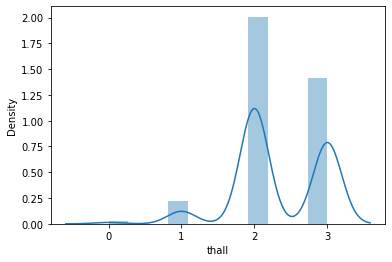

In [86]:
plt.figure()
sns.distplot(df['thall'])
plt.show()

In [87]:
np.mean(df['thall'])

2.3135313531353137

In [88]:
stats.mode(df['thall'])

ModeResult(mode=array([2], dtype=int64), count=array([166]))

In [89]:
df.iloc[166]['thall']

3.0

thall is Symmetric Skewed data & mode > mean, so it is Left Skewed or Negative Skewed

In [90]:
print('\nSkewness for output = ', skew(df.output))


Skewness for output =  -0.17892962380969754


C:\Users\dell\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


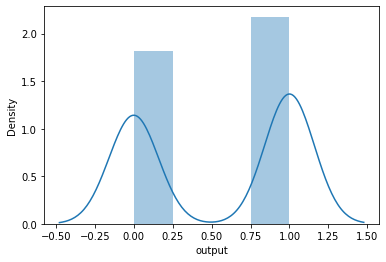

In [91]:
plt.figure()
sns.distplot(df['output'])
plt.show()

In [92]:
np.mean(df['output'])

0.5445544554455446

In [93]:
stats.mode(df['output'])

ModeResult(mode=array([1], dtype=int64), count=array([165]))

In [94]:
df.iloc[165]['output']

0.0

output is Symmetric Skewed data & mean > mode, so it is Right skewed or Positive Skewed

2-e. Use ML LDA, Perceptron, and LogisticRegression from sklearn to classify the trained data and report the accuracy. [10 pts]

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [96]:
clf1 = LinearDiscriminantAnalysis()
x=df[['cp','exng','oldpeak','slp']]
y=df['output']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [98]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [102]:
clf1 = LinearDiscriminantAnalysis(n_components=2)
X_train = clf1.fit_transform(X_train, y_train)
X_test = clf1.transform(X_test)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [103]:
y_pred = clf1.predict(X_test)

In [104]:
clf1_accuracy = accuracy_score(y_test,y_pred)
print(clf1_accuracy)

0.7049180327868853


While running this for first time this function takes only first elements of datframe for some reason(i tried to debugge), but after changing the n_components it runs perfectly.

Perceptron

In [124]:
clf2 = Perceptron()
x=df[['cp','exng','oldpeak','thalachh','slp']]
y=df['output']

In [125]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
X_train = np.array(X_train)
sc = StandardScaler()
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [126]:
X_train_std = sc.transform(X_train)
# X_train_std = np.array(X_train_std)
X_test_std = sc.transform(np.array(X_test))
X_test_std = np.array(X_test_std)
X_train.shape

#y_train.shape

(242, 5)

In [127]:
clf2 = Perceptron(n_iter_no_change=10000, eta0=0.001, random_state=0)


clf2.fit(X_train_std, y_train)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.001,
           fit_intercept=True, max_iter=1000, n_iter_no_change=10000,
           n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [128]:
y_pred = clf2.predict(X_test_std)

In [129]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

In [130]:
clf2_accuracy = accuracy_score(y_test,y_pred)
print(clf2_accuracy)

0.7704918032786885


Perceptron end

Logistic regression

In [112]:
x=df[['cp','exng','oldpeak','caa','slp','thall']]
y=df['output']

In [113]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [114]:
clf3 = LogisticRegression()

clf3.fit(X_train,y_train)

y_pred=clf3.predict(X_test)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [115]:
y_pred=clf3.predict(X_test)

In [116]:
clf3_accuracy = accuracy_score(y_test,y_pred)
clf3_accuracy

0.8360655737704918

Logistic regression ends

2-f. Use the implemented classifiers from 2-a to 2-c and classify the output. [10 pts] 

In [131]:
clf4 = my_LDA()

clf4_accuracy = accuracy_score(y,y_pred)
# # I have not understood on what bases we calculate the accuracy of LDA

In [142]:
clf5 = my_Perceptron(X, y, lr=0.01, n_iters=100)

clf5_accuracy = accuracy_score(y_test,y_pred_per)
clf5_accuracy = clf5_accuracy
clf5_accuracy

0.8524590163934426

In [143]:
clf6 = my_LogisticRegression(X, y, lr=0.01, n_iters=100)

clf6_accuracy = accuracy_score(y_test, y_pred_lr) 
clf6_accuracy = clf6_accuracy
clf6_accuracy

0.8852459016393442

In [144]:
result_table = pd.DataFrame(['Model',['clf1','clf2','clf3','clf5','clf6'],
                             'Accuracy',[clf1_accuracy,clf2_accuracy,clf3_accuracy,
                                                                                  clf5_accuracy,clf6_accuracy]])
result_table 

,0
0,Model
1,"[clf1, clf2, clf3, clf5, clf6]"
2,Accuracy
3,"[0.7049180327868853, 0.7704918032786885, 0.836..."
